# Assignment 3: Web Scraping

## Q1. Scrape Book Catalog (5 points)
- Scape content of http://books.toscrape.com (1 point for overall logic)
- Write a function getData() to scrape **title** (see (1) in Figure), **rating** (see (2) in Figure), **price** (see (3) in Figure) of all books (i.e. 20 books) listed in the page. (1 point for each element)
  * For example, the figure shows one book and the corresponding html code. You need to scrape the highlighted content. 
  * For star ratings, you can simply scrape One, Two, Three, ... 
- The output is a list of 20 tuples, e.g. [('A Light in the ...','Three','£51.77'), ...] (1 point)
    <img src='assign3_q1.png' width='80%'>


## Q2. Plot data (5 points)
- Create a function plot_data which (1 point for overall logic)
  * takes the list of tuples from Q1 as an input
  * converts the price strings to numbers (1 point)
  * calculates the average price of books by ratings (1 point)
  * plots a bar chart for the average price. The plot may look similar to the figure below. (2 points)
  <img src='plot.png' width='50%'>

### Q3 (Bonus) Expand your solution to Q1 to scrape the full details of all books on http://books.toscrape.com (5 points)
- Write a function getFullData() to do the following: (1 point for overall logic)
   * Besides scraping title, rating, and price of each book as stated in Q1, also scrape the **full title** (see (4) in Figure), **description** (see (5) in Figure), and **category** (see (6) in Figure) in each individual book page. (2 points)
     * An example individual book page is shown in the figure below.
       <img src='assign3_q3a.png' width='60%'>
   
   * Scape all book listing pages following the "next" link at the bottom. The figure below gives an screenshot of the "next" link and its corresponding html code. (2 points)
   * Do not hardcode page URLs (except http://books.toscrape.com) in your code. (deduct 1 point if URLs are hardcoded)
      <img src='assign3_q3.png' width='80%'>
   * The output is a list containing 1000 tuples, 
     - e.g. [('A Light in the ...','Three','£51.77', 'A Light in the Attic', "It's hard to imagine a world without A Light in the Attic. This now-classic collection ...",'Poetry'), ...]
    

In [5]:


import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#get_ipython().magic('matplotlib inline')

def plot_data(data):
    df = pd.DataFrame(data, columns=["title","rating","price"])
    df["price"]=df["price"].apply(lambda x: float(x[1:]))
    print(df)
    ax=df.groupby("rating")["price"].mean().plot.bar(title="average price by rating")
    ax.set(ylabel="average price", xlabel="rating")
    plt.show()
    
    
def getData():
    
    
    data=[]  # variable to hold all reviews
    
    page_url="http://books.toscrape.com"

    page = requests.get(page_url) 
    
    if page.status_code==200:    # a status code !=200 indicates a failure, exit the loop 
                                     # status_code 200 indicates success.
            # insert your code to process page content
            soup = BeautifulSoup(page.content, 'html.parser')
            #divs=soup.select("div div div.competition-info")
            articles=soup.select("div ol.row li article")

            print(len(articles))
            for article in articles:
            #print idx, div
                title=None
                rating=None
                price=None
                
                # get title
                title_element=article.select("h3 a")
                if title_element!=[]:
                    title=title_element[0].get_text()
                    
                # get rating
                rating_element=article.select("p.star-rating")
                if rating_element!=[]:
                    if len(rating_element[0])>1:
                        rating=rating_element[0]["class"][1]
                
                # get price
                price_element=article.select("div p.price_color")
                if price_element!=[]:
                    price=price_element[0].get_text()
                
                    
            # add title, description, and temperature as a tuple into the list
                data.append((title, rating, price))      
            
    return data

20
                                    title rating  price
0                      A Light in the ...  Three  51.77
1                      Tipping the Velvet    One  53.74
2                              Soumission    One  50.10
3                           Sharp Objects   Four  47.82
4            Sapiens: A Brief History ...   Five  54.23
5                         The Requiem Red    One  22.65
6            The Dirty Little Secrets ...   Four  33.34
7                 The Coming Woman: A ...  Three  17.93
8                     The Boys in the ...   Four  22.60
9                         The Black Maria    One  52.15
10  Starving Hearts (Triangular Trade ...    Two  13.99
11                  Shakespeare's Sonnets   Four  20.66
12                            Set Me Free   Five  17.46
13    Scott Pilgrim's Precious Little ...   Five  52.29
14                      Rip it Up and ...   Five  35.02
15                  Our Band Could Be ...  Three  57.25
16                                   Olio    

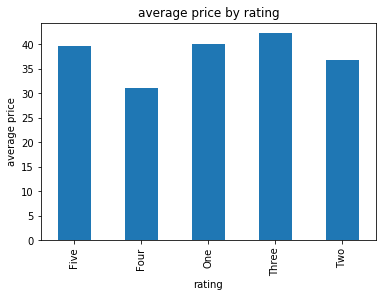

In [6]:
data=getData()
plot_data(data)

In [2]:
def getArticleDetails(article_link):
    page = requests.get(article_link)
    if page.status_code==200: 
        
        soup = BeautifulSoup(page.content, 'html.parser')
        
        title=None
        desc=None
        category=None
        
        # get title
        title_element=soup.select("div h1")
        if title_element!=[]:
            title=title_element[0].get_text()
            
        # get description
        desc_element=soup.select("div#product_description")
        if desc_element!=[]:
            desc=desc_element[0].next_sibling.next_sibling.get_text()
        
        # get category
        cat_element=soup.select("ul.breadcrumb li a")
        if cat_element!=[]:
            category=cat_element[-1].get_text()
            
        return((title, desc, category))
    
def getArticle(article, page_url)  :
    
    #print idx, div
    title=None
    rating=None
    price=None
        
    article_link=None
    full_title, desc, category=None, None, None
                
    # get title
    title_element=article.select("h3 a")
    if title_element!=[]:
        title=title_element[0].get_text().strip()
        article_link=title_element[0]["href"]
        
        if ".html" in page_url:
            article_link=page_url[0:(page_url.rfind("/")+1)]+article_link
        else:
            article_link=page_url+"/"+article_link
        
        #print(article_link)            
        
        full_title, desc, category=getArticleDetails(article_link)
                    
    # get rating
    rating_element=article.select("p.star-rating")
    if rating_element!=[]:
        if len(rating_element[0])>1:
            rating=rating_element[0]["class"][1]
                
    # get price
    price_element=article.select("div p.price_color")
    if price_element!=[]:
        price=price_element[0].get_text()

    # get article link
    link_element=article.select("div p.price_color")
    if price_element!=[]:
        price=price_element[0].get_text()
            
    return(title, rating, price, full_title, desc, category)
        
def getFullData():
    
    
    data=[]  # variable to hold all book data
    
    page_url="http://books.toscrape.com"
   
    
    while page_url!=None:
        
        print("getting page: "+ page_url)
        
        page = requests.get(page_url) 
        
        if page.status_code==200:    # a status code !=200 indicates a failure, exit the loop 
                                     # status_code 200 indicates success.
            
            soup = BeautifulSoup(page.content, 'html.parser')
            
            articles=soup.select("div ol.row li article")

    
            for article in articles:
                title, rating, price, full_title, desc, category = getArticle(article, page_url) 
                
                data.append((title, rating, price, full_title, desc, category))
                
            # get next page link

            next_element=soup.select("div ul li.next a")
            
            if next_element!=[]:
                if ".html" in page_url:
                    page_url=page_url[0:(page_url.rfind("/")+1)]+next_element[0]["href"]
                else:
                    page_url=page_url+"/"+next_element[0]["href"]
            else:
                page_url=None         
            
    return data

In [3]:
data=getFullData()
print(len(data))
print(data[899])

getting page: http://books.toscrape.com
getting page: http://books.toscrape.com/catalogue/page-2.html
getting page: http://books.toscrape.com/catalogue/page-3.html
getting page: http://books.toscrape.com/catalogue/page-4.html
getting page: http://books.toscrape.com/catalogue/page-5.html
getting page: http://books.toscrape.com/catalogue/page-6.html
getting page: http://books.toscrape.com/catalogue/page-7.html
getting page: http://books.toscrape.com/catalogue/page-8.html
getting page: http://books.toscrape.com/catalogue/page-9.html
getting page: http://books.toscrape.com/catalogue/page-10.html
getting page: http://books.toscrape.com/catalogue/page-11.html
getting page: http://books.toscrape.com/catalogue/page-12.html
getting page: http://books.toscrape.com/catalogue/page-13.html
getting page: http://books.toscrape.com/catalogue/page-14.html
getting page: http://books.toscrape.com/catalogue/page-15.html
getting page: http://books.toscrape.com/catalogue/page-16.html
getting page: http://bo